In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing, linear_model

In [2]:
df=pd.read_csv('diabetes_data.csv')
#顯示所有列
pd.set_option('display.max_columns',None)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
#評估缺失值
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [5]:
#評估每列中唯一值的數量
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#使用dataframe顯示結果
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


In [6]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [7]:
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes']

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


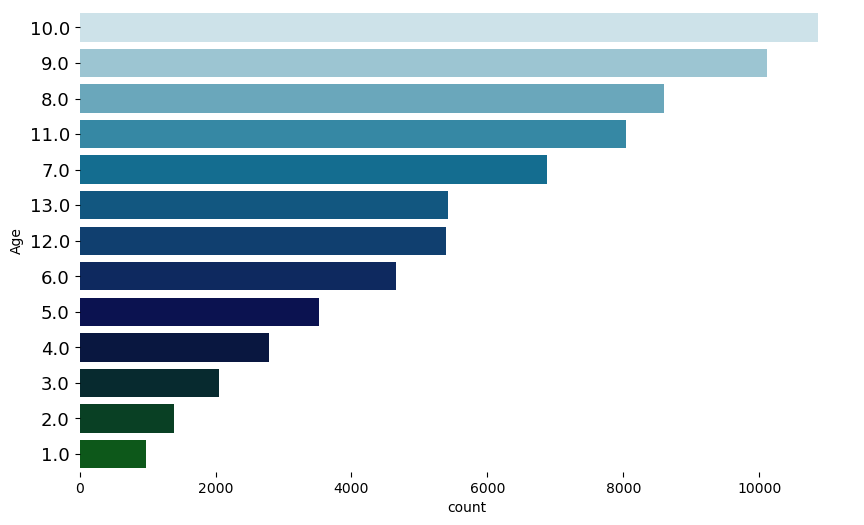

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


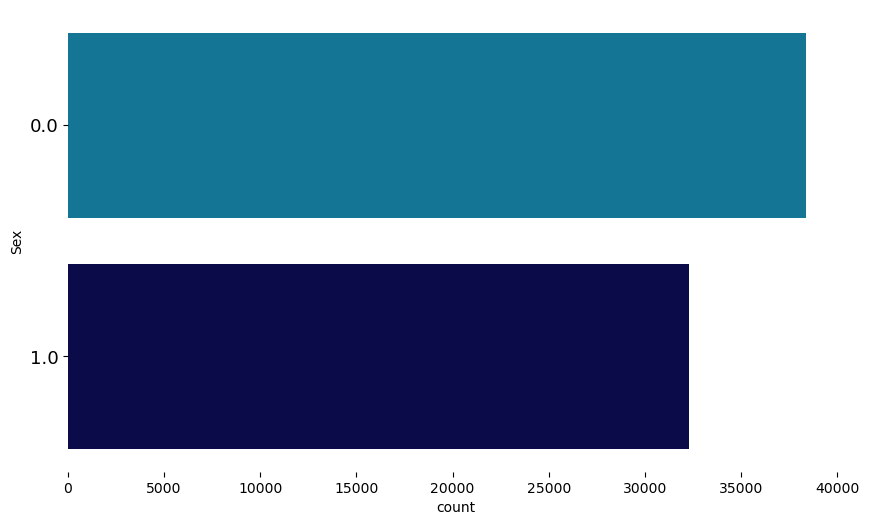

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


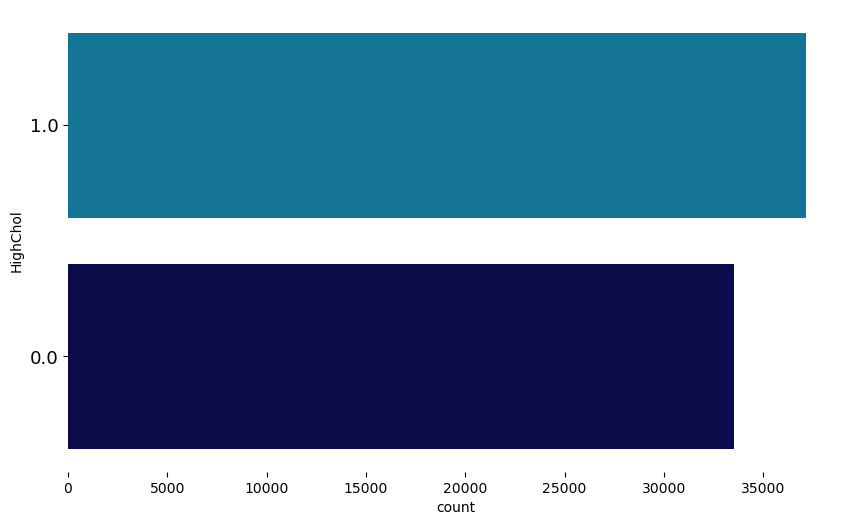

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


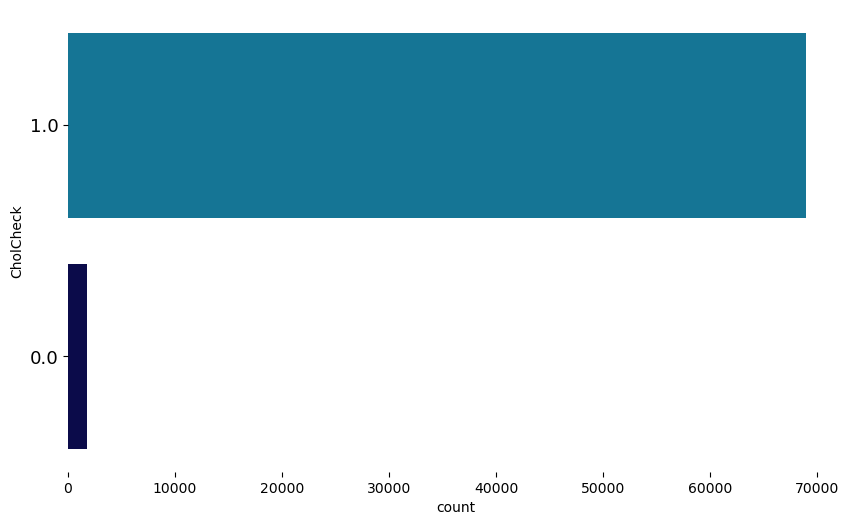

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


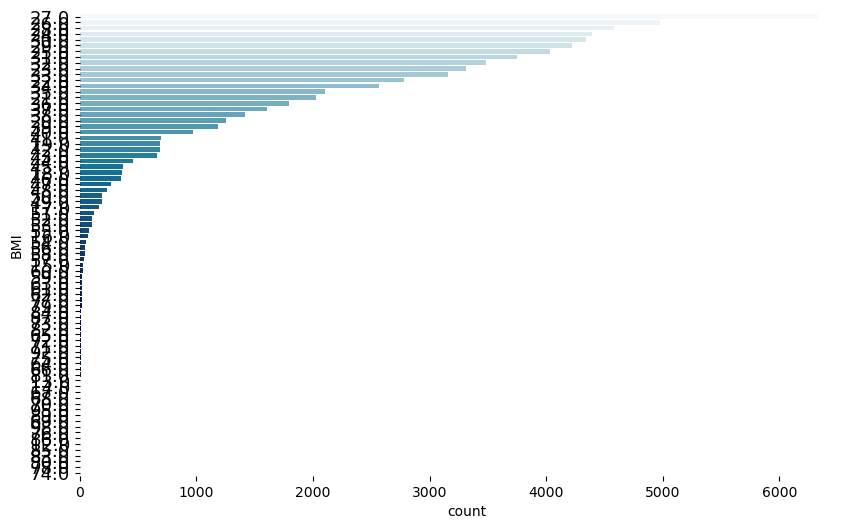

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


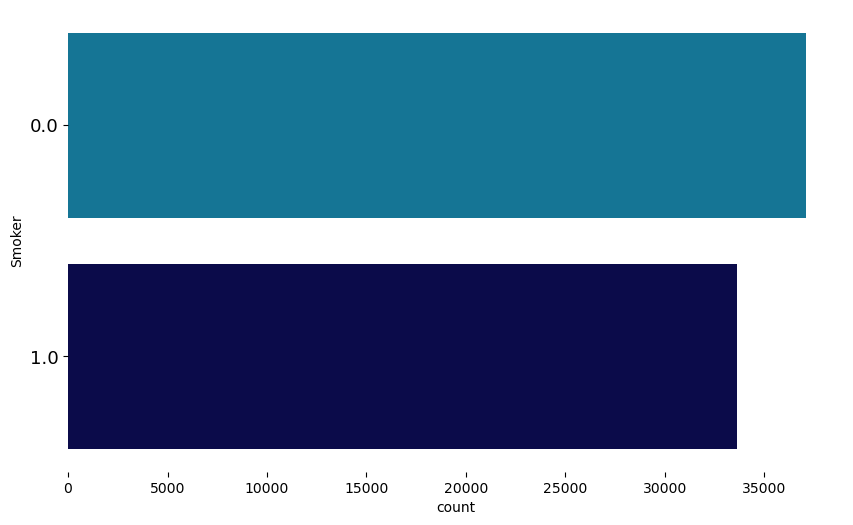

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


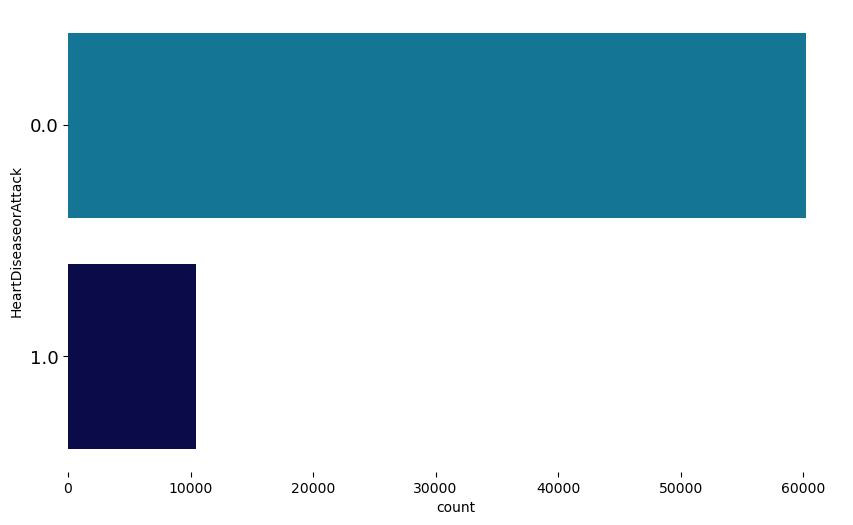

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


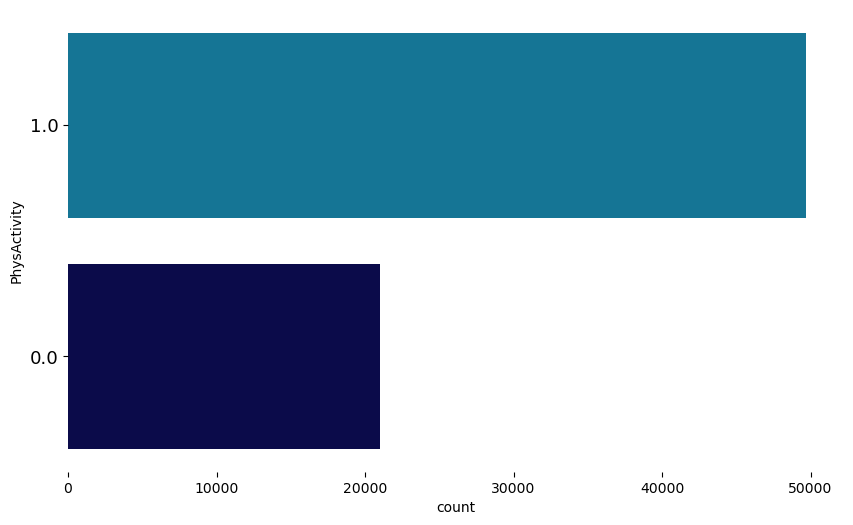

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


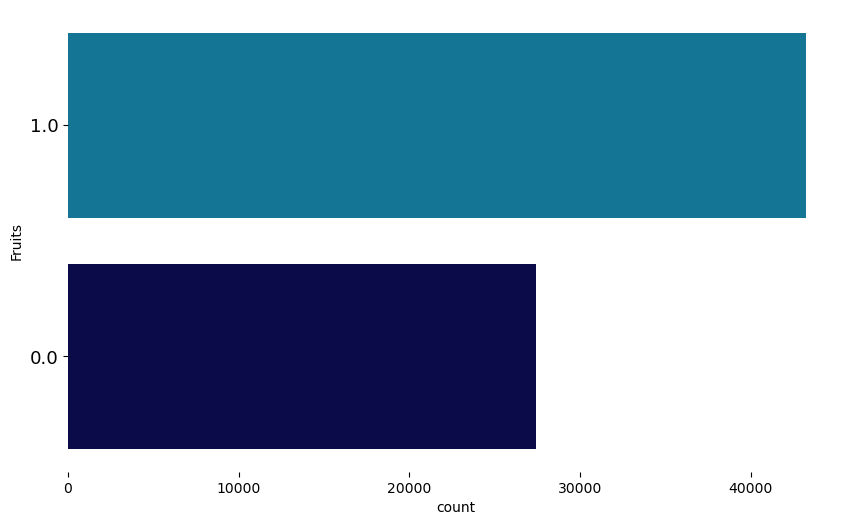

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


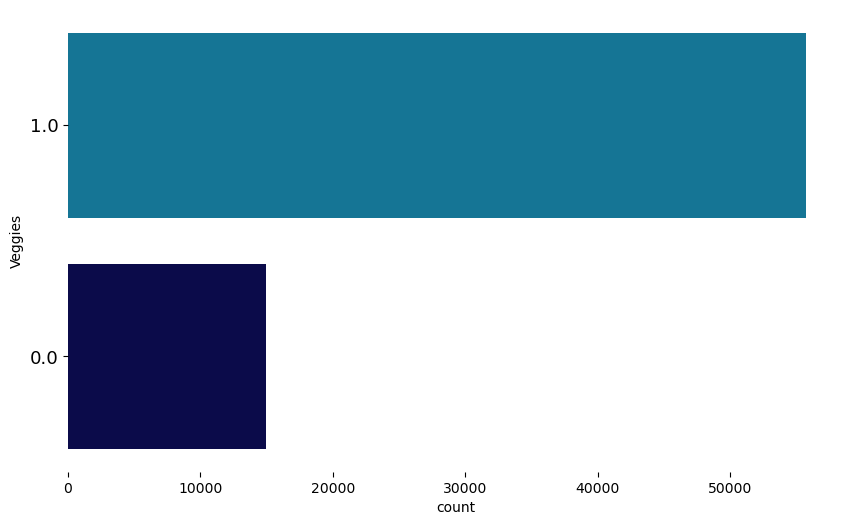

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


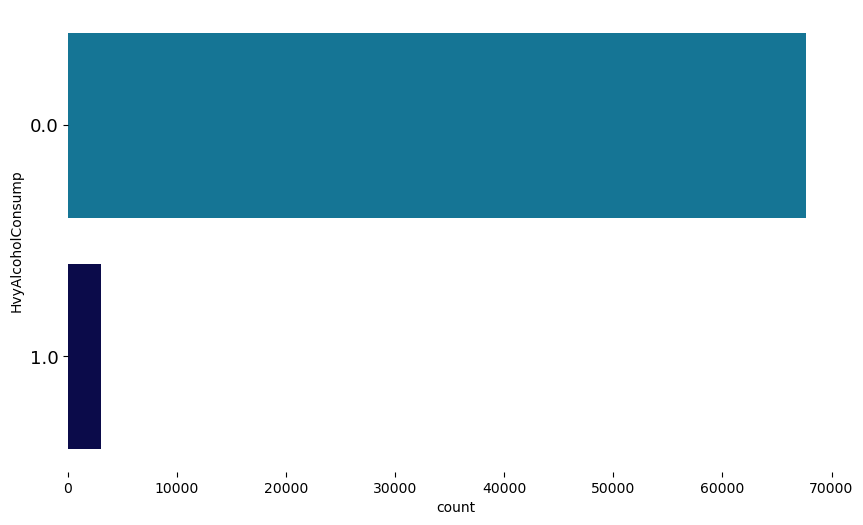

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


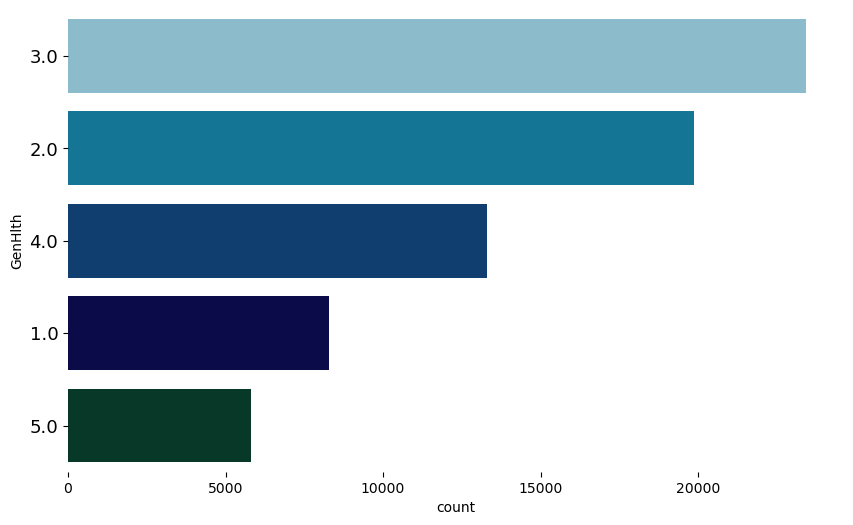

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


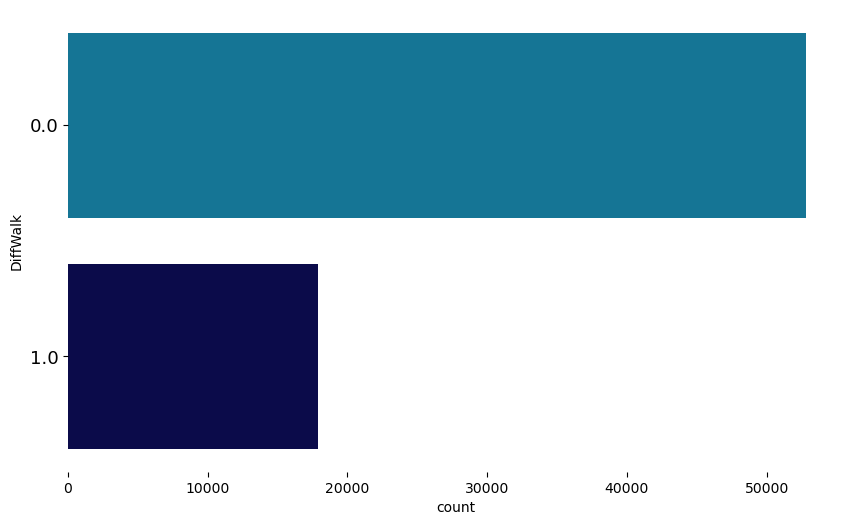

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


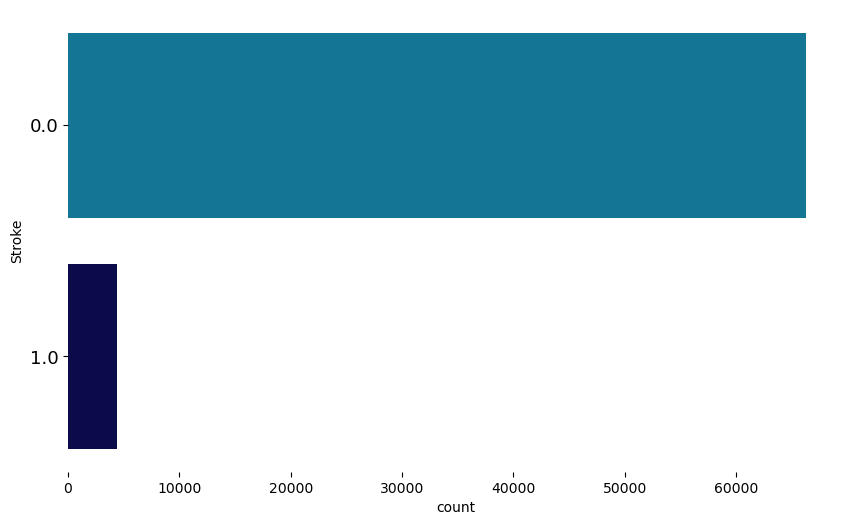

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


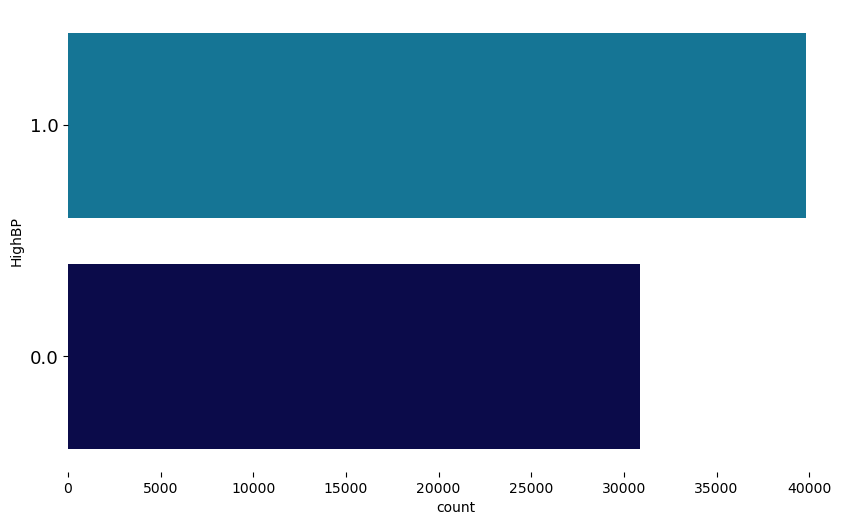

~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~


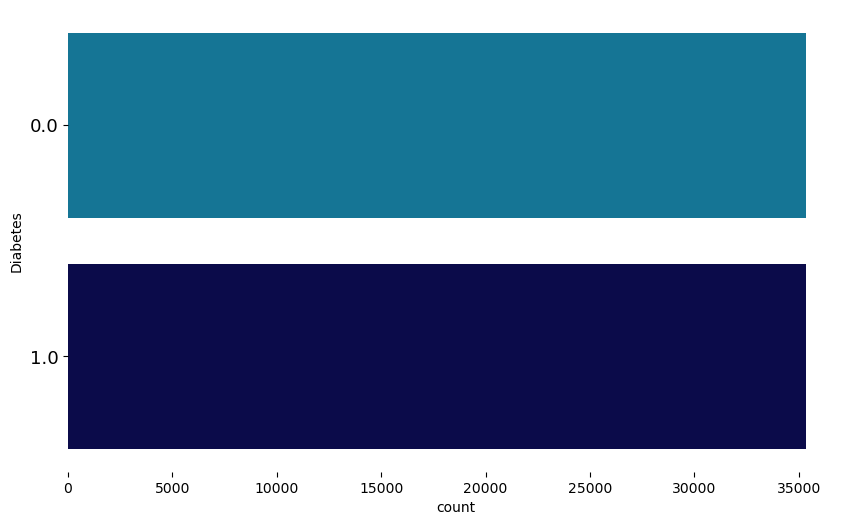

In [8]:
#呈現分類特徵的計數圖
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(10, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='ocean_r')
  plt.ylabel(i)
  plt.yticks(fontsize=13)
  print("~~~~~~~~~~~~~~~下一張~~~~~~~~~~~~~~~")
  plt.box(False)
  plt.show()

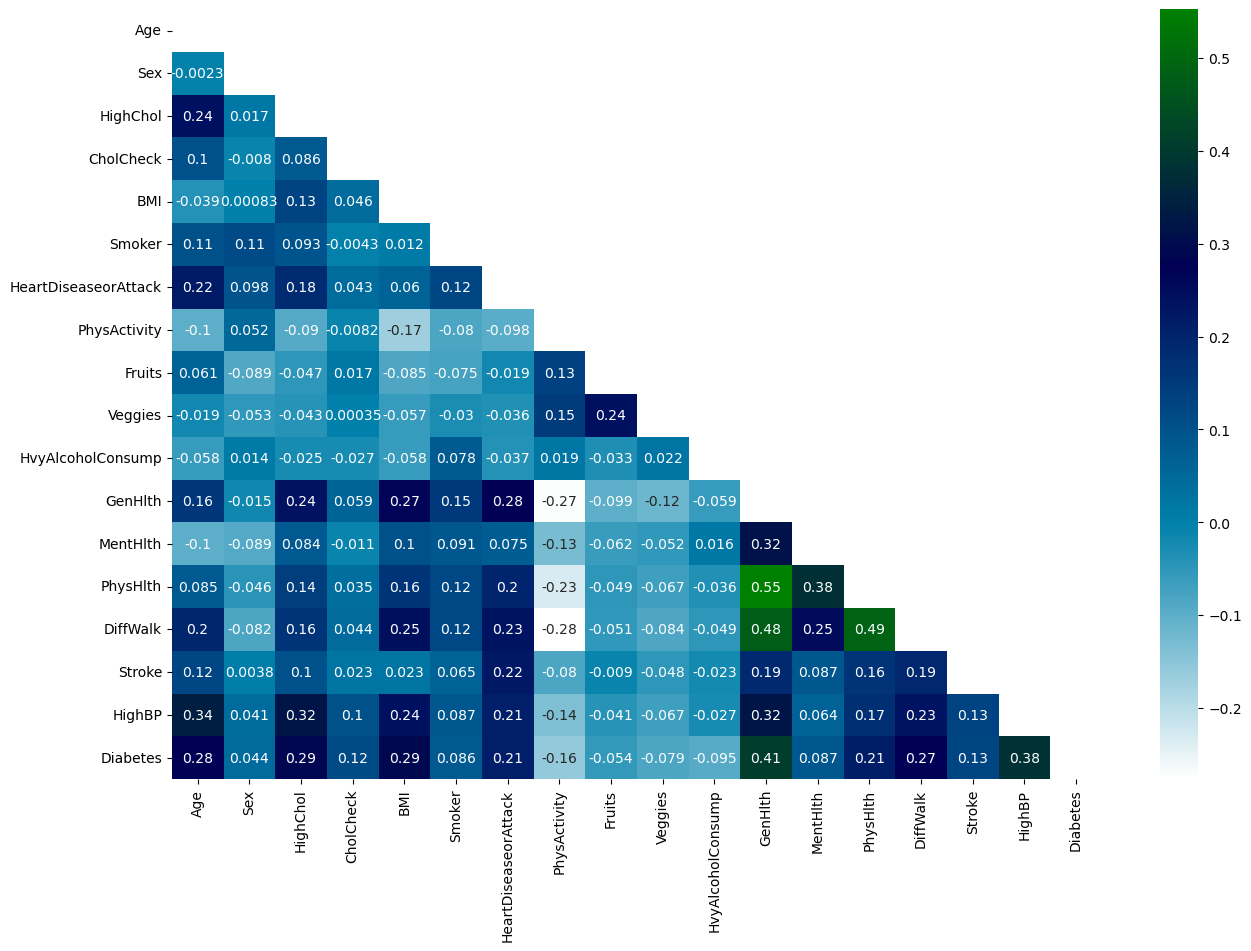

In [9]:
#根據相關性構建熱圖
plt.figure(figsize=(15,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='ocean_r')
plt.show()

In [10]:
#現在使用這個熱圖，那些可能對模型貢獻不足的特徵取決於它們與目標（中風）列的相關性將從數據集中刪除
#'Sex' 'Smoker' 'Fruits' Veggies 'MentHlth'相關性較小 不採用 
#'CholCheck' 'HvyAlcoholConsump'高度不平衡 不採用
data=df.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
data.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#將資料分成應變數及自變數 
X=data.drop('Stroke',axis=1)
y=data['Stroke']

In [12]:
#切割資料為測試30%及訓練70%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)
print(X_train.shape)
print(X_test.shape)

(49484, 10)
(21208, 10)


In [13]:
#標準化數據
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
#建立模型及準確率的dataframe
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

In [19]:
#模型測試過程
def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    mse = np.mean((y_pred - y_test) ** 2)
    print("MSE:",mse)
    #confusion_matrix(y_test,y_pred,labels=clf.classes_)
    plot_confusion_matrix(model,X_test_scaled,y_test)

In [20]:
accuracy_model

,Model,Accuracy


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.30      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.62      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208

MSE: 0.06238211995473406
準確率: 0.8915002829197316


C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


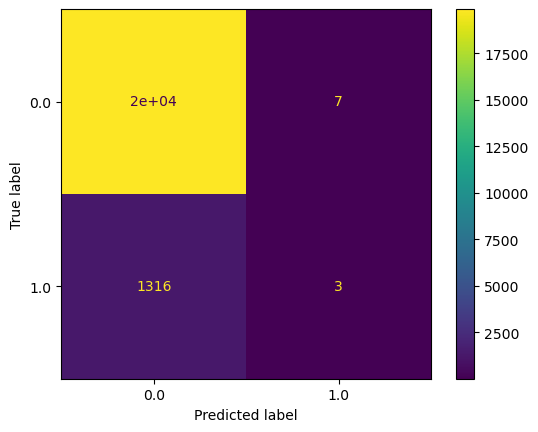

In [21]:
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=linear_model.LogisticRegression()
#logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test(logreg)
survived_predictions = logreg.predict(X_train)
accuracy = logreg.score(X_train, y_train)
print("準確率:",accuracy)